In [2]:
!pip install tensorflow
!pip uninstall -y jax jaxlib
!pip install --upgrade pip
!pip install --upgrade "jax[cpu]"

Found existing installation: jax 0.5.3
Uninstalling jax-0.5.3:
  Successfully uninstalled jax-0.5.3
Found existing installation: jaxlib 0.5.3
Uninstalling jaxlib-0.5.3:
  Successfully uninstalled jaxlib-0.5.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 48.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 MB 63.7 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jax]


Importing Libraries

In [3]:
#step 1:Importing Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,models
!pip install openpyxl
!pip install -U imbalanced-learn

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.3 is installed, but it is not compatible with the installed jaxlib version 0.7.0, so it will not be used.
  warnings.warn(


Uploading and Loading Dataset-https://archive.ics.uci.edu/dataset/360/air+quality

In [5]:
#step 2:Upload Dataset
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


Cleaning the Dataset

In [6]:
df=pd.read_excel('AirQualityUCI.xlsx',engine='openpyxl')
#handling the missing values
df.replace(-200,np.nan,inplace=True)
#dropping empty columns
df.dropna(axis=1,how='all',inplace=True)
#checking for missing values
print(df.isnull().sum())
#replacing missing values by average
df.fillna(df.mean(numeric_only=True),inplace=True)
#combining date and time into datetime
df['Datetime']=pd.to_datetime(df['Date'].astype(str)+' '+df['Time'].astype(str),format= '%Y-%m-%d %H:%M:%S')
#dropping original date and time columns
df.drop(['Date','Time'],axis=1,inplace=True)
#extracting hours,weekdays and months
df['hour']=df['Datetime'].dt.hour
df['weekday']=df['Datetime'].dt.weekday
df['month']=df['Datetime'].dt.month
#saving the dataset
df.to_csv('cleaned_AirQualityUCI.csv',index=False,sep=';',decimal=',')
print('Dataset has been cleaned and saved successfully.')

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Dataset has been cleaned and saved successfully.


Loading and previewing the Dataset

In [7]:
df = pd.read_csv('cleaned_AirQualityUCI.csv', sep=';', decimal=',', engine='python')
df.columns = df.columns.str.strip()
df = df.dropna()
# Create a simplified AQI column
df['AQI'] = df['CO(GT)'] * 0.6 + df['NO2(GT)'] * 0.4
df.head()
#Create AQI category
df['AQI_category']=df['AQI'].apply(lambda x:'Good' if x<=50 else 'Moderate' if x<=100 else 'Unhealthy')

print(df)

      CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6      1360.00  150.000000  11.881723        1045.50    166.0   
1        2.0      1292.25  112.000000   9.397165         954.75    103.0   
2        2.2      1402.00   88.000000   8.997817         939.25    131.0   
3        2.2      1375.50   80.000000   9.228796         948.25    172.0   
4        1.6      1272.25   51.000000   6.518224         835.50    131.0   
...      ...          ...         ...        ...            ...      ...   
9352     3.1      1314.25  218.811816  13.529605        1101.25    471.7   
9353     2.4      1162.50  218.811816  11.355157        1027.00    353.3   
9354     2.4      1142.00  218.811816  12.374538        1062.50    293.0   
9355     2.1      1002.50  218.811816   9.547187         960.50    234.5   
9356     2.2      1070.75  218.811816  11.932060        1047.25    265.2   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH  \
0         

Plotting the distribution of class-labels

     AQI AQI_Level
0  46.76      Good
1  38.00      Good
2  46.92      Good
3  50.12  Moderate
4  47.36      Good


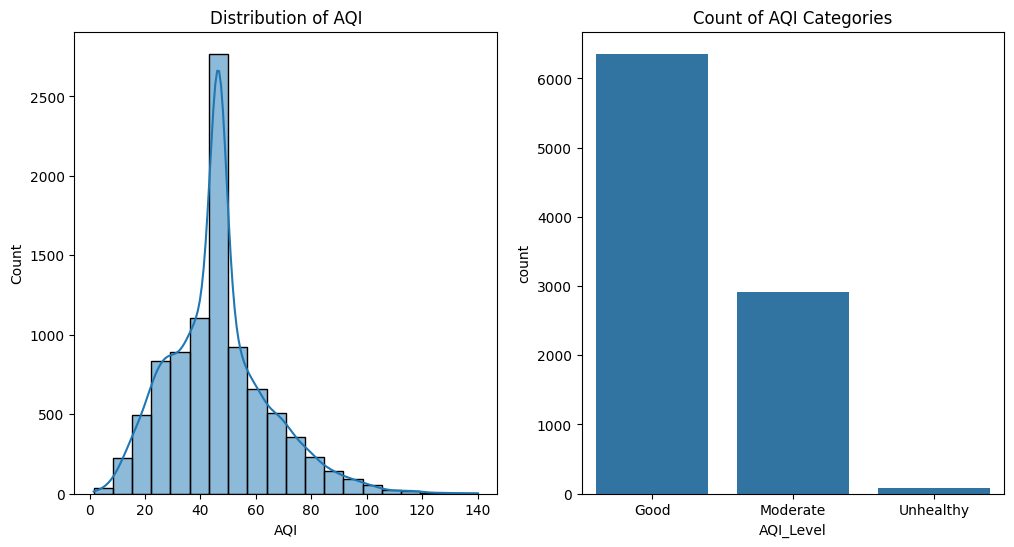

In [8]:
# Plot histogram and category count
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['AQI'], bins=20, kde=True)
plt.title('Distribution of AQI')

plt.subplot(1, 2, 2)
if 'AQI' not in df.columns:
    df['AQI'] = df['CO(GT)'] * 0.6 + df['NO2(GT)'] * 0.4

df['AQI_Level'] = df['AQI'].apply(
    lambda x: 'Good' if x <= 50 else 'Moderate' if x <= 100 else 'Unhealthy'
)

print(df[['AQI', 'AQI_Level']].head())

sns.countplot(x='AQI_Level', data=df)
plt.title("Count of AQI Categories")
plt.show()


Visual Representation of Pollution Trends and Relationships

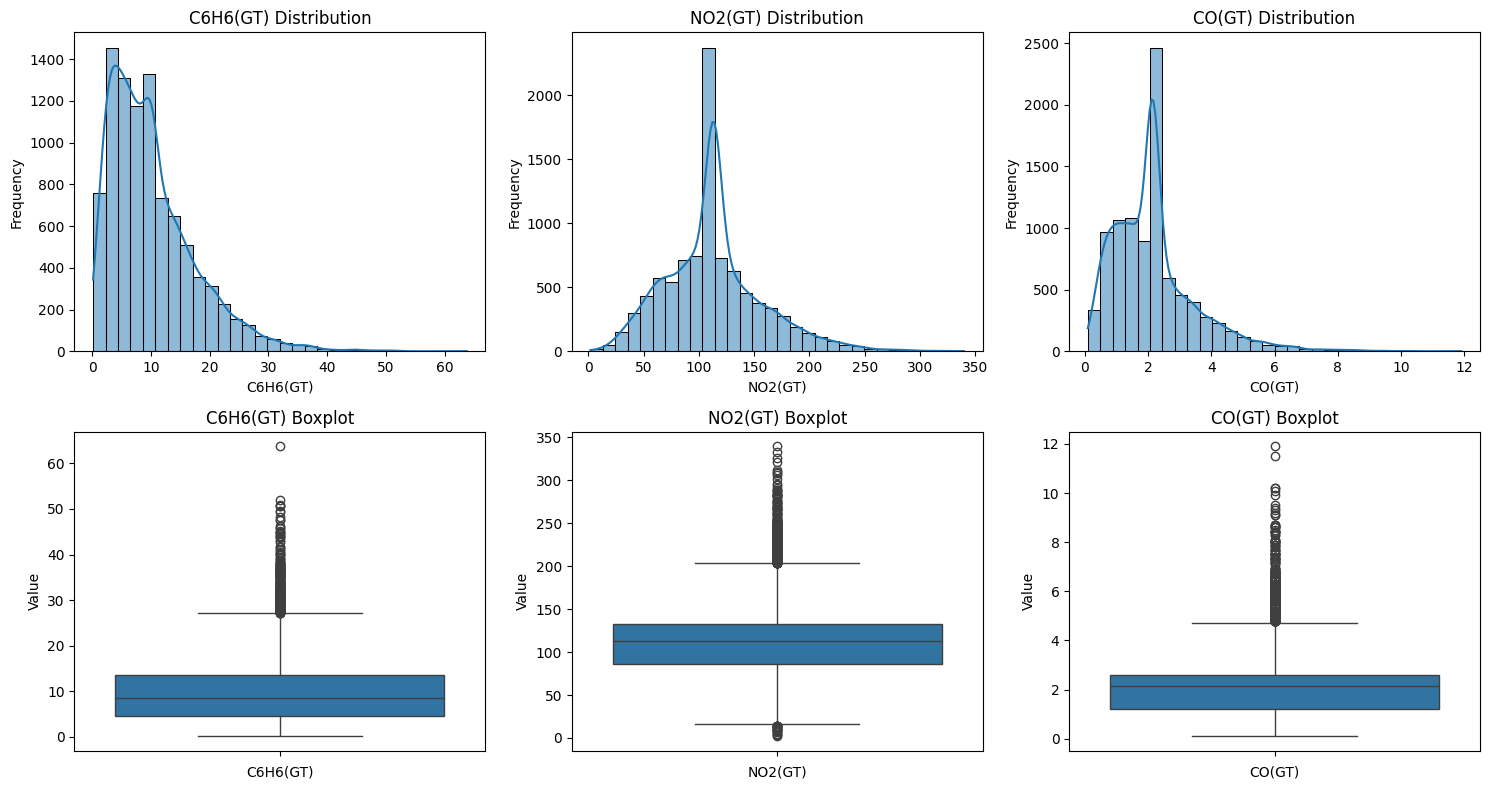

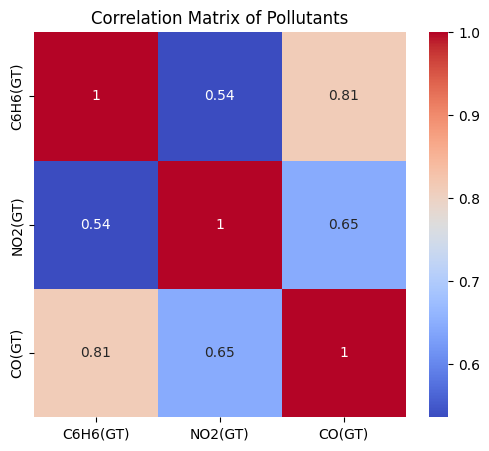

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['C6H6(GT)', 'NO2(GT)', 'CO(GT)']

# Create a grid: 2 rows x number of pollutants columns
fig, axes = plt.subplots(2, len(pollutants), figsize=(15, 8))

#  Plotting Histograms
for i, pollutant in enumerate(pollutants):
    sns.histplot(df[pollutant], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{pollutant} Distribution')
    axes[0, i].set_xlabel(pollutant)
    axes[0, i].set_ylabel('Frequency')

#  Plotting Boxplots
for i, pollutant in enumerate(pollutants):
    sns.boxplot(y=df[pollutant], ax=axes[1, i])
    axes[1, i].set_title(f'{pollutant} Boxplot')
    axes[1, i].set_xlabel(pollutant)
    axes[1, i].set_ylabel('Value')

plt.tight_layout()  # Prevents overlap
plt.show()

#  Plotting Correlation Heatmap Separately
plt.figure(figsize=(6, 5))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')
plt.show()



Converting the labels to One-Hot encoding





In [10]:
from sklearn.preprocessing import OneHotEncoder

y = df['AQI_Level'].values.reshape(-1, 1)

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform labels
y_encoded = encoder.fit_transform(y)

# Optional: print the encoded class labels
print("Class labels:", encoder.categories_)

Class labels: [array(['Good', 'Moderate', 'Unhealthy'], dtype=object)]


 Data Preprocessing: Encoding, Feature Extraction, and Scaling


    Feature  Importance
2   NO2(GT)    0.650063
1   NOx(GT)    0.134284
0    CO(GT)    0.110645
3  C6H6(GT)    0.031708
9     month    0.023293
7      hour    0.019046
6        AH    0.014040
4         T    0.007742
5        RH    0.007169
8   weekday    0.002011


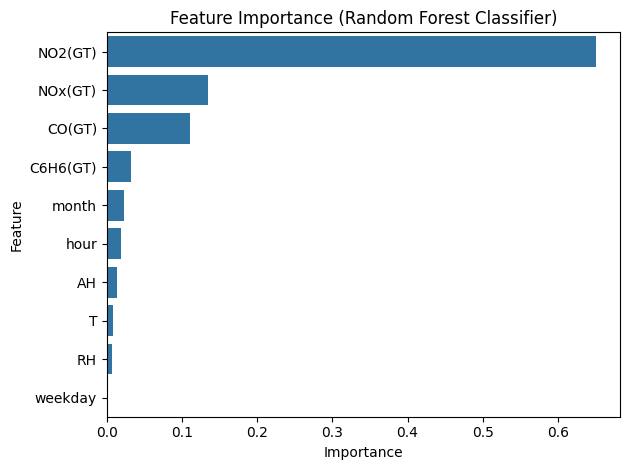

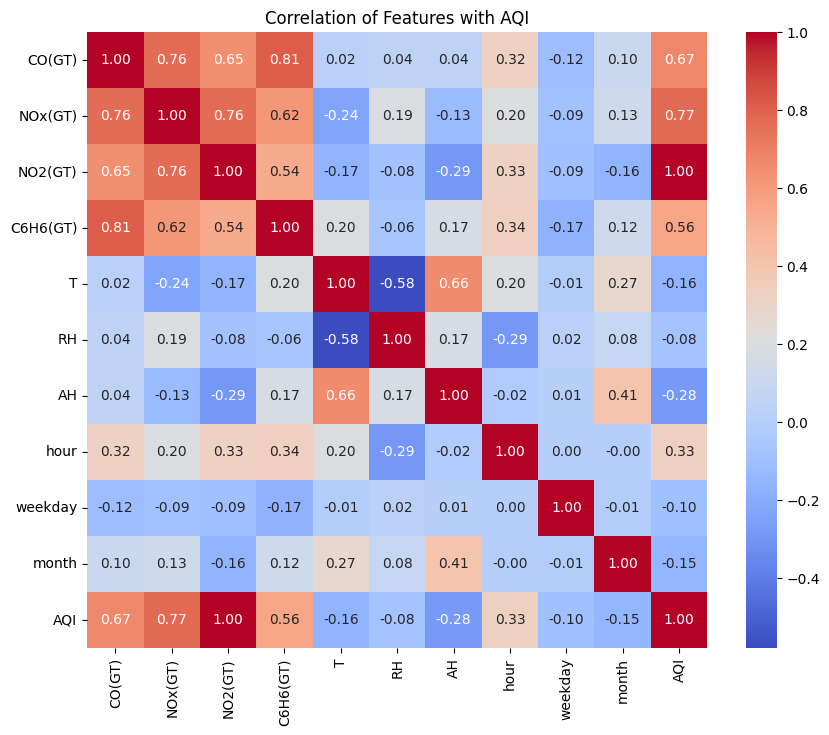

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7390 - loss: 0.6574 - val_accuracy: 0.9185 - val_loss: 0.2138
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9198 - loss: 0.2260 - val_accuracy: 0.9546 - val_loss: 0.1338
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9463 - loss: 0.1666 - val_accuracy: 0.9646 - val_loss: 0.1008
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1326 - val_accuracy: 0.9726 - val_loss: 0.0776
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1029 - val_accuracy: 0.9766 - val_loss: 0.0614
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0741 - val_accuracy: 0.9820 - val_loss: 0.0500
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0678 - val_accuracy: 0.9840 - val_loss: 0.0433
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0612 - val_accuracy: 0.

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Define features and target
feature_cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)',
                'T', 'RH', 'AH', 'hour', 'weekday', 'month']
X = df[feature_cols]
y = df['AQI_category']  # Categorical AQI labels like 'Good', 'Moderate', etc.

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)

# Random Forest for feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest Classifier)')
plt.tight_layout()
plt.show()

# Correlation heatmap (optional)
corr_matrix = df[feature_cols + ['AQI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with AQI')
plt.show()

# Build TensorFlow Neural Network for Classification
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Output layer for classification

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Updated formula for AQI calcualtion

In [12]:
import pandas as pd

# Load your dataset with the correct separator and decimal
df = pd.read_csv('cleaned_AirQualityUCI.csv', sep=';', decimal=',')

# --- Sub-index calculation function ---
def calculate_subindex(Cp, breakpoints):
    for bp_lo, bp_hi, I_lo, I_hi in breakpoints:
        if bp_lo <= Cp <= bp_hi:
            return ((I_hi - I_lo) / (bp_hi - bp_lo)) * (Cp - bp_lo) + I_lo
    return None  # If value out of range

# --- Define breakpoints ---

# CO (mg/m³) - CPCB India
co_breakpoints = [
    (0, 1, 0, 50), (1, 2, 51, 100), (2, 10, 101, 200),
    (10, 17, 201, 300), (17, 34, 301, 400), (34, 50, 401, 500)
]

# NO₂ (µg/m³) - CPCB India
no2_breakpoints = [
    (0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
    (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)
]

# C₆H₆ (µg/m³) - Approximate for research only
c6h6_breakpoints = [
    (0, 5, 0, 50), (5, 10, 51, 100), (10, 20, 101, 200),
    (20, 30, 201, 300), (30, 50, 301, 400), (50, 100, 401, 500)
]

# --- Apply subindex calculation ---
df['CO_SubIndex'] = df['CO(GT)'].apply(lambda x: calculate_subindex(x, co_breakpoints))
df['NO2_SubIndex'] = df['NO2(GT)'].apply(lambda x: calculate_subindex(x, no2_breakpoints))
df['C6H6_SubIndex'] = df['C6H6(GT)'].apply(lambda x: calculate_subindex(x, c6h6_breakpoints))

# --- Calculate final AQI ---
df['AQI'] = df[['CO_SubIndex', 'NO2_SubIndex', 'C6H6_SubIndex']].max(axis=1)

# --- Classify AQI Levels ---
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(classify_aqi)

# --- Save updated dataset ---
df.to_csv('updated_aqi_dataset.csv', index=False)
print("AQI calculation complete. Sample data:")
print(df[['CO(GT)', 'NO2(GT)', 'C6H6(GT)', 'AQI', 'AQI_Category']])

AQI calculation complete. Sample data:
      CO(GT)  NO2(GT)   C6H6(GT)    AQI AQI_Category
0        2.6    113.0  11.881723  133.0     Moderate
1        2.0     92.0   9.397165  112.0     Moderate
2        2.2    114.0   8.997817  134.0     Moderate
3        2.2    122.0   9.228796  142.0     Moderate
4        1.6    116.0   6.518224  136.0     Moderate
...      ...      ...        ...    ...          ...
9352     3.1    189.8  13.529605  209.8         Poor
9353     2.4    179.2  11.355157  199.2     Moderate
9354     2.4    174.7  12.374538  194.7     Moderate
9355     2.1    155.7   9.547187  175.7     Moderate
9356     2.2    167.7  11.932060  187.7     Moderate

[9357 rows x 5 columns]


Using SMOTE for tackling imbalance in the labels

In [13]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Step 1: Prepare your features (X) and labels (y)
x = df[['T', 'C6H6(GT)']]  # Features selected from dataset
y = df['AQI_Category']     # Categories: Good, Satisfactory, Moderate, etc.

# Step 2: Encode AQI categories into numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Transforms AQI categories into 0,1,...,5
print('Label mapping:')
for i, label in enumerate(le.classes_):
    print(f'{i}: {label}')
print("Class counts before SMOTE:", Counter(y_train))


# Step 3: Split data before applying SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to balance training data
smote = SMOTE(random_state=42, k_neighbors=3) # Set k_neighbors to 4
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Class distribution BEFORE SMOTE:", Counter(y_train))
print("Class distribution AFTER SMOTE:", Counter(y_train_resampled))

# Step 5: One-hot encode the resampled labels
y_train_ohe = to_categorical(y_train_resampled, num_classes=len(le.classes_))
y_test_ohe = to_categorical(y_test, num_classes=len(le.classes_))

# Check results
print("First 5 encoded labels before one-hot encoding:", y_train[:5])
print("First 5 after one-hot encoding:\n", y_train_ohe[:5])

Label mapping:
0: Good
1: Moderate
2: Poor
3: Satisfactory
4: Severe
5: Very Poor
Class counts before SMOTE: Counter({np.int64(0): 5102, np.int64(1): 2314, np.int64(2): 69})
Class distribution BEFORE SMOTE: Counter({np.int64(1): 5010, np.int64(3): 1165, np.int64(2): 953, np.int64(0): 192, np.int64(5): 161, np.int64(4): 4})
Class distribution AFTER SMOTE: Counter({np.int64(3): 5010, np.int64(2): 5010, np.int64(1): 5010, np.int64(5): 5010, np.int64(0): 5010, np.int64(4): 5010})
First 5 encoded labels before one-hot encoding: [3 2 1 1 3]
First 5 after one-hot encoding:
 [[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


Plotting Resampled categories

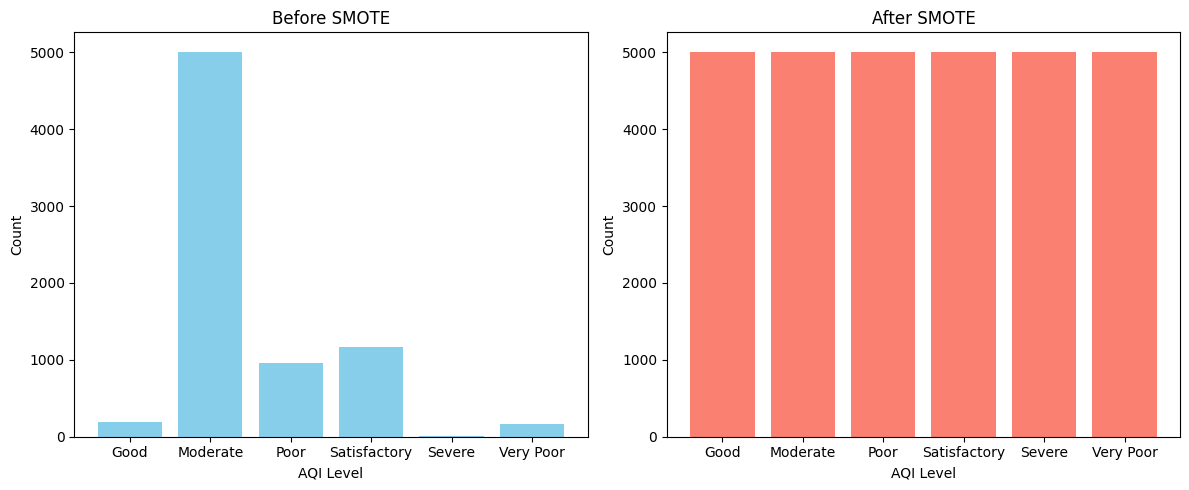

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Mapping back integer labels to original AQI_Level labels for visualization
label_names = le.classes_

# Count before and after resampling
before_counts = Counter(y_train)
after_counts = Counter(y_train_resampled)

# Create bar chart
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot before SMOTE
axs[0].bar(label_names, [before_counts[i] for i in range(len(label_names))], color='skyblue')
axs[0].set_title('Before SMOTE')
axs[0].set_xlabel('AQI Level')
axs[0].set_ylabel('Count')

# Plot after SMOTE
axs[1].bar(label_names, [after_counts[i] for i in range(len(label_names))], color='salmon')
axs[1].set_title('After SMOTE')
axs[1].set_xlabel('AQI Level')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Building the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
        layers.Input(shape=(2,)), # Corrected input shape
        layers.Dense(units=64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(units=32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(units=6, activation='softmax'),
    ])


Compiling and Training the Model

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_resampled,y_train_ohe,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5101 - loss: 1.4506 - val_accuracy: 0.1934 - val_loss: 4.0364
Epoch 2/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7036 - loss: 0.7190 - val_accuracy: 0.1934 - val_loss: 3.3218
Epoch 3/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7299 - loss: 0.6306 - val_accuracy: 0.1934 - val_loss: 2.8299
Epoch 4/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7344 - loss: 0.6167 - val_accuracy: 0.1934 - val_loss: 2.9446
Epoch 5/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7501 - loss: 0.5864 - val_accuracy: 0.1994 - val_loss: 1.7580
Epoch 6/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7554 - loss: 0.5600 - val_accuracy: 0.3711 - val_loss: 1.3789
Epoch 7/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7649 - loss: 0.5423 - val_accuracy: 0.2414 - val_loss: 2.0498
Epoch 8/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7671 - loss: 0.5346 - val_accu

Evaluating the model

In [17]:
from tensorflow.keras.models import load_model
loss, accuracy = model.evaluate(x_test, y_test_ohe)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5993 - loss: 0.7738
Test Loss: 0.7652
Test Accuracy: 62.02%


Predict on Test Sets

In [18]:
y_pred_probs = model.predict(x_test)
y_pred_classes= y_pred_probs.argmax(axis=1)  # Converts one-hot or softmax to class index
y_test_classes= y_test_ohe.argmax(axis=1)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Comparing Training and testing Accuracies and Losses

940/940 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training Accuracy: 76.52%
Testing Accuracy: 62.02%


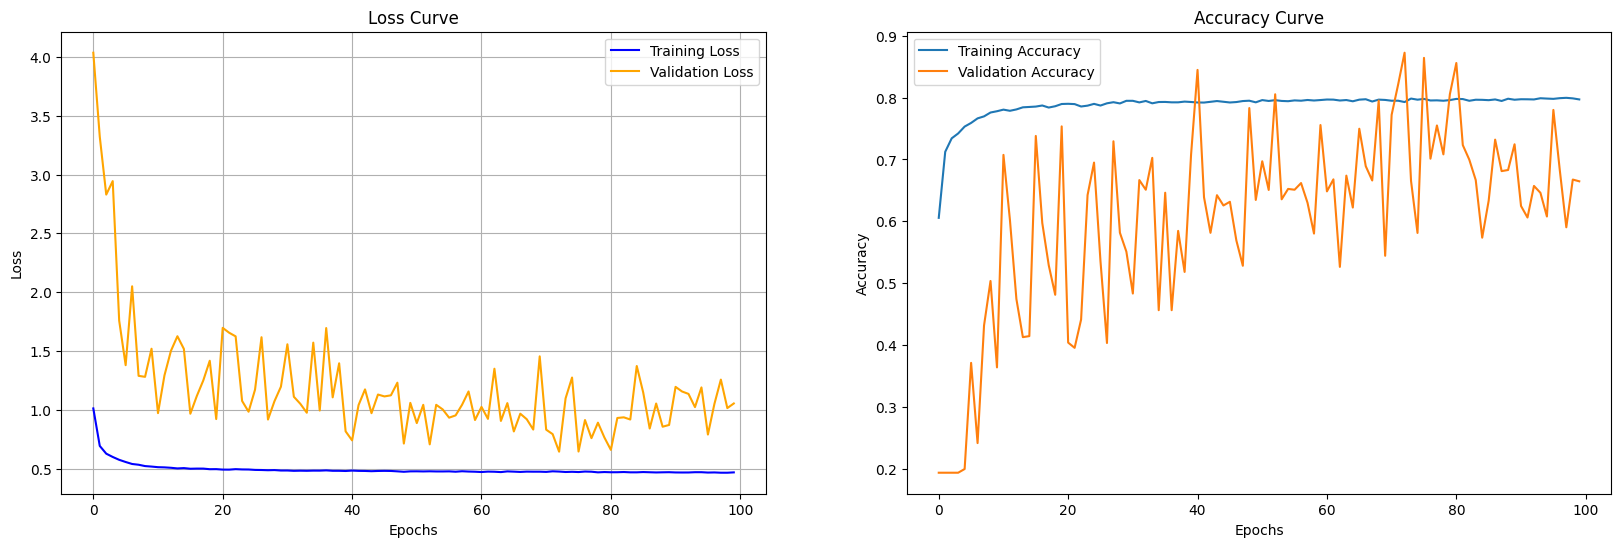

In [19]:
from sklearn.metrics import accuracy_score

#predict on training and testing dataset
y_train_pred=model.predict(x_train_resampled)
y_test_pred=model.predict(x_test)
#predict the training and testing classes
y_train_pred_classes=y_train_pred.argmax(axis=1)
y_test_pred_classes=y_test_pred.argmax(axis=1)
#calculating accuracy
train_acc=accuracy_score(y_train_ohe.argmax(axis=1),y_train_pred_classes)
test_acc=accuracy_score(y_test_ohe.argmax(axis=1),y_test_pred_classes)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

#plot
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Displaying the Confusion Matrix

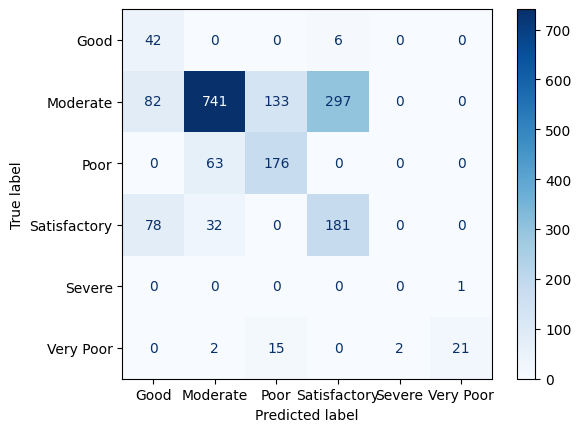

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

# Re-encode y_test to get the correct dimensions for the confusion matrix
encoder = OneHotEncoder(sparse_output=False)
y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1))
y_test_classes = y_test_encoded.argmax(axis=1)
aqi_labels = ['Good', 'Moderate', 'Poor', 'Satisfactory', 'Severe', 'Very Poor']
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=aqi_labels)
disp.plot(cmap='Blues')

Checking the Model

In [21]:
def test_model_with_input(model, X_test, y_test_encoded, temp, c6h6):
    import numpy as np

    # Predict on test set to calculate accuracy
    loss, accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
    print(f" Model Test Accuracy: {accuracy * 100:.2f}%")

    # Predict for custom input
    input_data = np.array([[temp, c6h6]])
    predicted_probs = model.predict(input_data)
    predicted_class_index = np.argmax(predicted_probs, axis=1)[0]

    # Define class labels (adjust if different)
    aqi_labels = ['Good', 'Moderate', 'Unhealthy']
    predicted_label = aqi_labels[predicted_class_index]

    print(f" Predicted AQI Category for T={temp}, C6H6={c6h6}: {predicted_label}")
test_model_with_input(model,x_test, y_test_encoded, temp=45.0, c6h6=15)


 Model Test Accuracy: 62.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
 Predicted AQI Category for T=45.0, C6H6=15: Moderate


Classification Report

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

        Good       0.21      0.88      0.34        48
Satisfactory       0.88      0.59      0.71      1253
    Moderate       0.54      0.74      0.63       239
        Poor       0.37      0.62      0.47       291
   Very Poor       0.00      0.00      0.00         1
      Severe       0.95      0.53      0.68        40

    accuracy                           0.62      1872
   macro avg       0.49      0.56      0.47      1872
weighted avg       0.75      0.62      0.65      1872



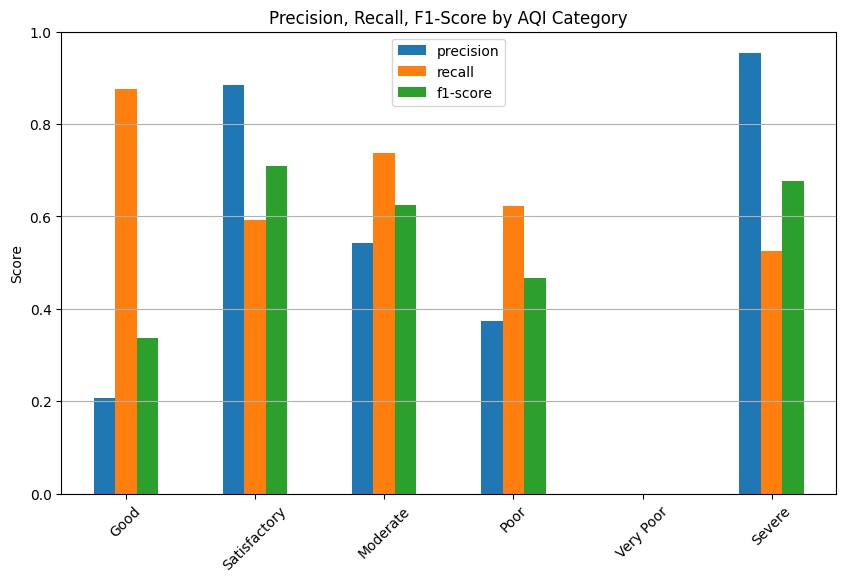

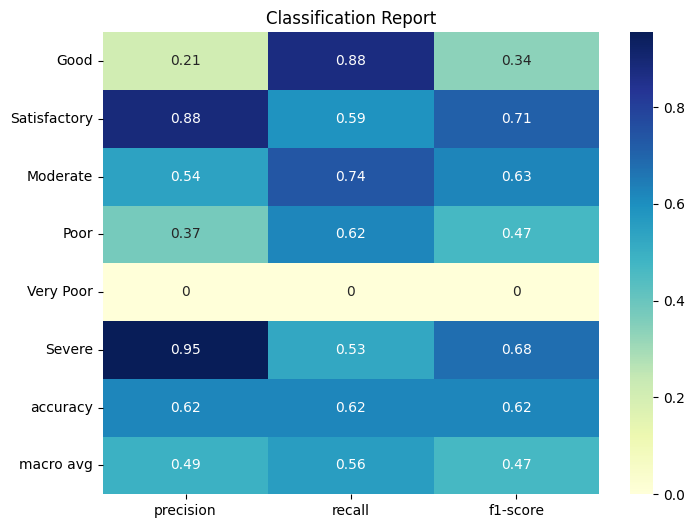

In [22]:
from sklearn.metrics import classification_report
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(x_test)

# Get predicted class indices from probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get true class indices from one-hot encoded labels
y_true_classes = np.argmax(y_test_ohe, axis=1)

# Define full AQI label list
aqi_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=aqi_labels))

report = classification_report(y_true_classes, y_pred_classes, target_names=aqi_labels, output_dict=True)

#Extract precision, recall, f1-score for each class
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.iloc[:6]  # Only class rows

# Plot precision, recall, f1-score
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, F1-Score by AQI Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0, 1)
plt.show()
#plotting the Classification heatmap
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()
